Time series can have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.

## Reference
- https://facebook.github.io/prophet/docs/trend_changepoints.html

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])

19:53:57 - cmdstanpy - INFO - Chain [1] start processing
19:53:57 - cmdstanpy - INFO - Chain [1] done processing


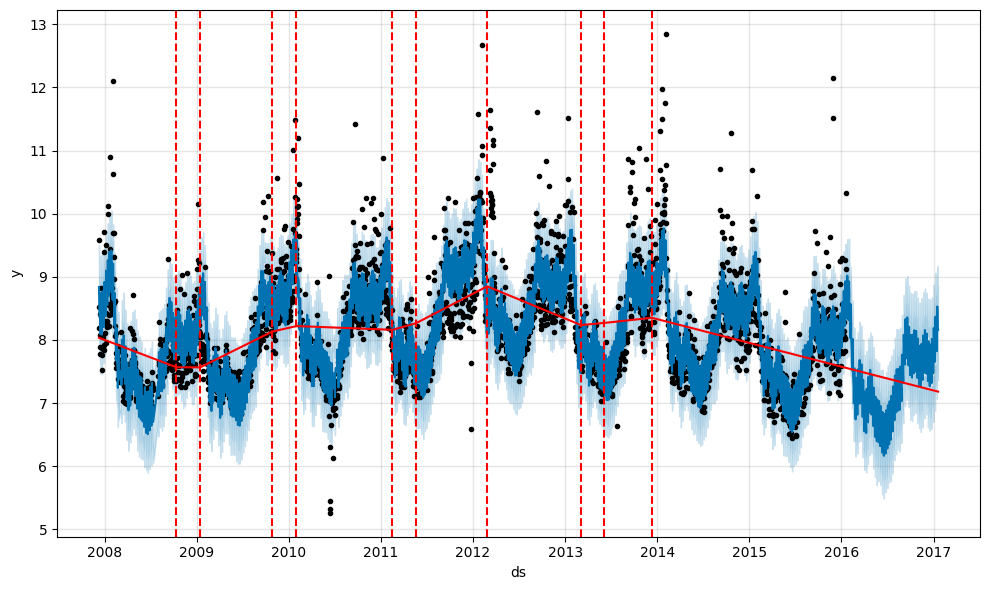

In [4]:
m = Prophet() # default changepoint_prior_scale=0.05
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
# visualize the locations of the significant change points
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

## Increasing `changepoint_prior_scale` makes the trend MORE flexible

19:53:57 - cmdstanpy - INFO - Chain [1] start processing
19:53:58 - cmdstanpy - INFO - Chain [1] done processing


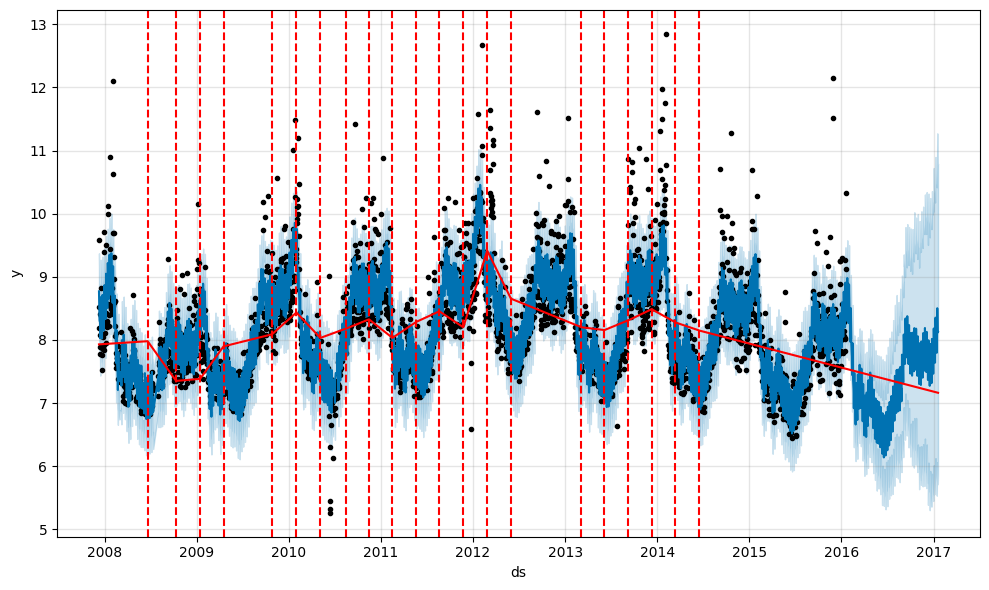

In [5]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
# visualize the locations of the significant change points
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Decreasing `changepoint_prior_scale` makes the trend LESS flexible

19:53:59 - cmdstanpy - INFO - Chain [1] start processing
19:53:59 - cmdstanpy - INFO - Chain [1] done processing


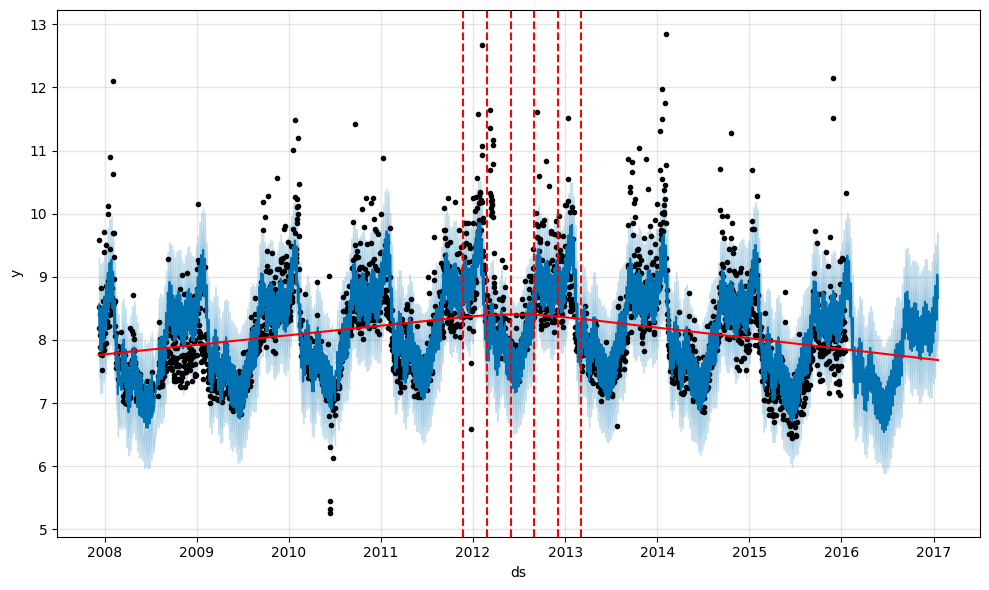

In [6]:
m = Prophet(changepoint_prior_scale=0.001)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
# visualize the locations of the significant change points
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Specifying the locations of the changepoints

19:53:59 - cmdstanpy - INFO - Chain [1] start processing
19:54:00 - cmdstanpy - INFO - Chain [1] done processing


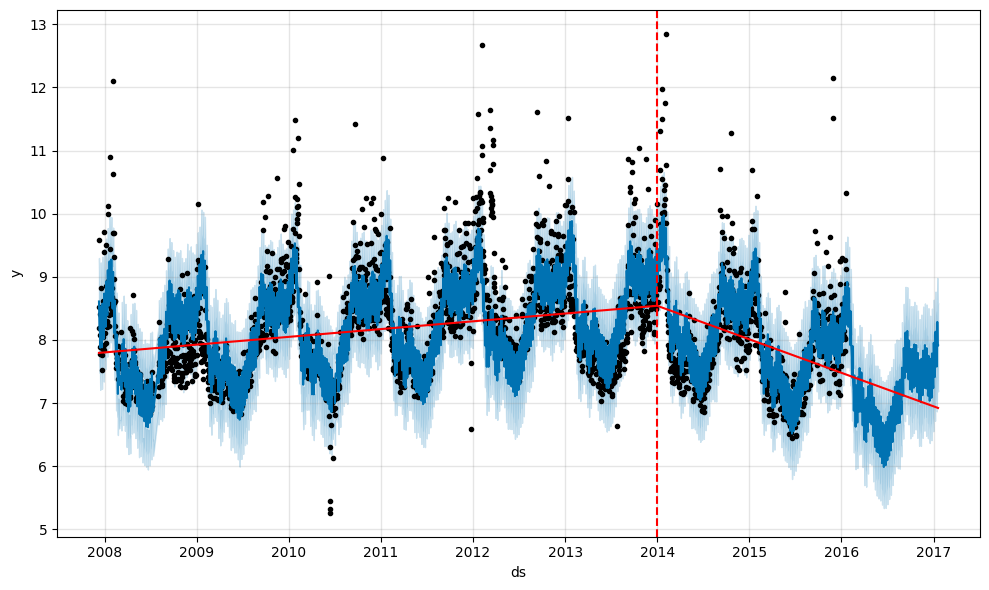

In [7]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
# visualize the locations of the significant change points
a = add_changepoints_to_plot(fig.gca(), m, forecast)

By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the changepoint_range argument. For example, `m = Prophet(changepoint_range=0.9)` will place potential changepoints in the first 90% of the time series.